### Project Summary:

Using **Tranfer Learning** and **Data Augmentation** to Classify Flower Images:
    
In this project I create an algorithm capable of classifying 5 types of flowers with a 98% accuracy.
For this I used a flower data set containing pictures of 3700 pictures of 5 different flower types: Roses, daisy, dandelion, sunflower and tulips.

In [16]:
def image_look():
    import pathlib
    import PIL
    import random
    
    pictures_path_list = list((pathlib.Path('datasets/flower_photos')).glob("*/*.jpg")) 
    return PIL.Image.open(pictures_path_list[random.randint(0,3700)])

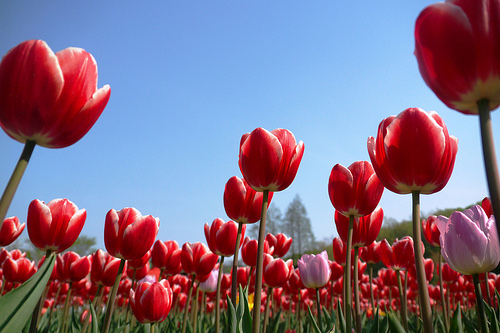

In [14]:
image_look() # run this function to look at random pictures in the dataset to get an idea of the type of pictures

### Schema of the project:

1) **Load  and inspect the data**. 

   * Create the path list using **glob**
    
   * Create a dict with the list of paths for each label, and a dict with the lables associated to a number (labeling)
    
   * Using the dict get the np.array format and resize all pictures (**cv2**) to get **X** and use the label-dict to get **y**

2) **Split** the data to create test, train and valid sets.

3) **Transer Learning**. 

 * Get a good candidate for this use case. Xception
 * Preprocess the data sets
 * Create a base model using the **Xception** model and add our own end_model
 * Train the model including a ImageDataGenerator object to include **data augmentation** features
    
     * First, train the model with all Xception model layers frozen
     * Second, unfreeze the layers to fine tune and achieve higher accuracy


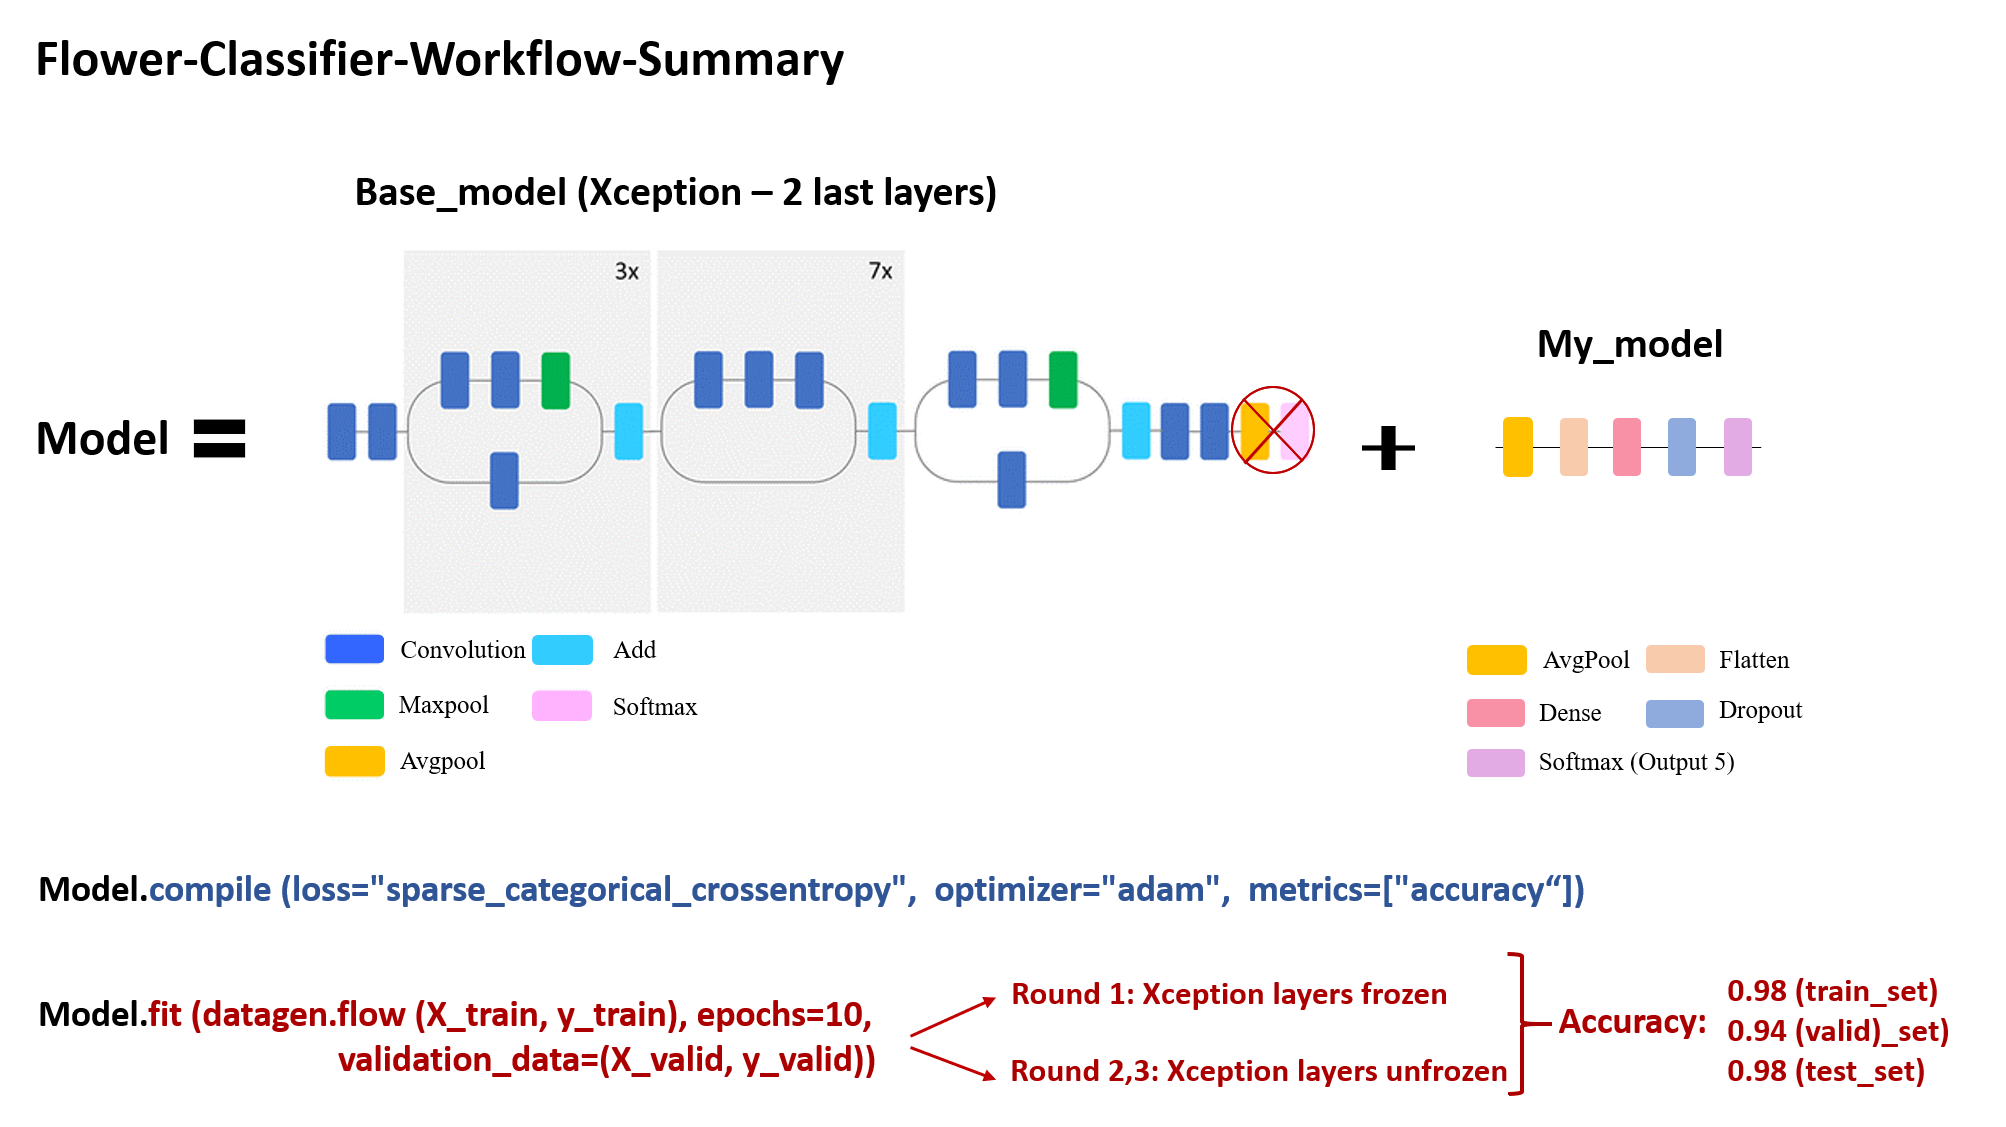

In [77]:
PIL.Image.open(r".\figures\summary_flower_classifier_workflow.png")

Import Necessary Libraries

In [18]:
# Data Handling
import numpy as np
import pandas as pd
import random
import os

# Image Library Tools
import cv2 # OpenCv: computer vision applications
from tensorflow.keras.preprocessing import image # we can use img = image.load_img(path, target_size=(,)) and image.img_to_array(img)
import pathlib # will be useful when reading the image paths
import PIL # image library tool

# Data Split and Data Preprocessing
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator 


# Modeling
import tensorflow as tf
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

# Plotting
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

# Ignoring warnings
import warnings
warnings.filterwarnings("ignore")

In [4]:
!python -V

Python 3.7.4


In [5]:
tf.__version__

'2.3.1'

In [7]:
keras.__version__

'2.4.0'

In [3]:
# 1. Download Data

# dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
# data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)


# Note: cache_dir indicates where to download data. I specified "." which means current directory
# untar=true will unzip it

In [21]:
data_dir = pathlib.Path('datasets/flower_photos')

In [22]:
pictures_path_list = list(data_dir.glob("*/*.jpg")) # we can use the glob method to retrieve all the paths with a jpg extension
# Note: We need to specify */* so that glob looks for all these jpg objects in all folders

In [23]:
len(pictures_path_list)

3670

To work with different labeled pictures, it is usefull to create a dict. Keys = Flower Type, Values = path

In [24]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

How many pictures of each type of flower do we have?

In [25]:
list_flowers = ["roses", "daisy", "dandelion", "sunflowers", "tulips"]

In [26]:
for i in list_flowers:
    print("There are {} pictures of {}".format(len(flowers_images_dict[i]), i))

There are 641 pictures of roses
There are 633 pictures of daisy
There are 898 pictures of dandelion
There are 699 pictures of sunflowers
There are 799 pictures of tulips


Lets also create a label dict to assign to each flower type a number

In [27]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

Inspect the different flower types in this dataset

In [28]:
# we can use PIL to quickly inspect elements.
def image_inspector(flower):
    return PIL.Image.open(flowers_images_dict[flower][random.randint(0,600)]) # picking a picture at random

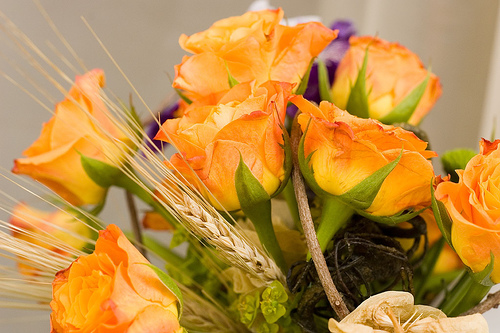

In [29]:
image_inspector("roses")

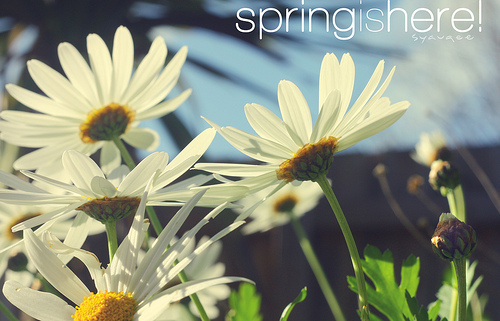

In [21]:
image_inspector("daisy")

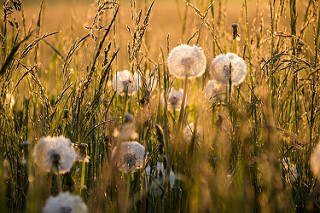

In [45]:
image_inspector("dandelion")

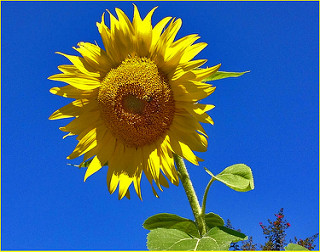

In [15]:
image_inspector("sunflowers")

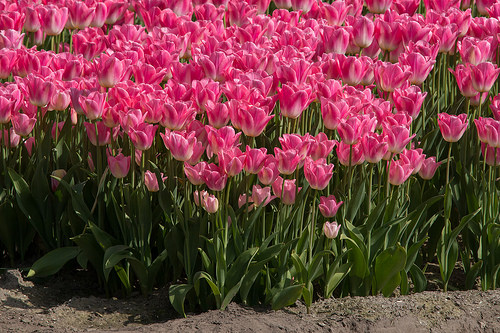

In [16]:
image_inspector("tulips")

Next we will use the module cvs (openCV) that allow us to convert the images into arrays with shape (width, height, rgb).

Furthermore, it allow us to resize all the pictures to have the same size for modeling. For a single pic works as follow

In [30]:
img_size = 299 # choose the size for the model that we are planning to use during tranfer learning

In [31]:
X, y = [], []

for flower_name, image_paths in flowers_images_dict.items(): # each key for a list of hundreds of paths(image_paths is a list)
    for image_path in image_paths:
        img = image.load_img(str(image_path), target_size = (img_size,img_size)) 
        img_array = image.img_to_array(img)
        # optionally  we can use img = cv2.imread(str(image_path)), img_array = cv2.resize(img, (256,256))
        # the difference is subtle, cv.imread uses BGR format whereas image.load_img uses RGB
        X.append(img_array)
        # furthermore, we could use img=keras.applications.xception.preprocess_input(img) to get ready the images right away for the model of choice 
        y.append(flowers_labels_dict[flower_name])

X = np.array(X)
y = np.array(y)

In [32]:
X.shape

(3670, 299, 299, 3)

In [33]:
y.shape

(3670,)

In [34]:
pd.Series(y).value_counts() 
# we could will use stratify = y in the test split to guarantee equal distribution of the targets across the sets
# The ammount of roses (label 0), daisy (label 1) and sunflowers (label 2) pictures are in slightly lower proportions

2    898
4    799
3    699
0    641
1    633
dtype: int64

I will split the data in:

* 2570 (70%) for train
* 550 (15%) for test
* 550 (15%) for validation

In [35]:
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.15, random_state=42, stratify = y)
# remember than when using train_test_split we randomize the samples ✔

In [36]:
X_train_full = X_train_full 
X_test = X_test 
X_train, X_valid = X_train_full[:-550], X_train_full[-550:]
y_train, y_valid = y_train_full[:-550], y_train_full[-550:]

In [37]:
# we can remove some of the variables to free RAM memory if needed
import gc

del [[X,y]] # keep deleting the variables not needed for next steps for safe memory
gc.collect()


7372

In [38]:
X_train.shape

(2569, 299, 299, 3)

Also, make sure our values are of float32 type at this point to save memory usage

In [39]:
X_train.dtype

dtype('float32')

In [38]:
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")
X_valid = X_valid.astype("float32")

In [39]:
X_train.dtype

dtype('float32')

**Transfer learning**

We will split the model in two parts model = Xception_model_layers + my_model. After that, use model_base to extract features by model_base.predict() and then feed these features into model_top and train only the model_top.

Next let’s load the **xception model**, pretrained on ImageNet.

In [20]:
Xception_model = tf.keras.applications.xception.Xception(weights="imagenet")

The pretrained models assume that the images are preprocessed in a
specific way. In some cases they may expect the inputs to be scaled from 0
to 1, or –1 to 1, and so on. Each model provides a preprocess_input()
function that you can use to preprocess your images. **These functions
assume that the pixel values range from 0 to 255**:

In [40]:
X_train = keras.applications.xception.preprocess_input(X_train)
X_valid = keras.applications.xception.preprocess_input(X_valid)
X_test = keras.applications.xception.preprocess_input(X_test)

Now we can extract features from the previous model for our dataset

In [ ]:
X_train_features = Xception_model_layers.predict(X_train)
X_valid_features = Xception_model_layers.predict(X_valid)
X_test_features = Xception_model_layers.predict(X_test)

Next let’s load an Xception model, pretrained on ImageNet. We exclude
the top of the network by setting include_top=False: **this excludes the
global average pooling layer and the dense output layer**. We then add our
own global average pooling layer, based on the output of the base model,
followed by a dense output layer with one unit per class, using the softmax
activation function.. Finally, we create the Keras Model:

In [ ]:
base_model = keras.applications.Xception(weights='imagenet', input_shape=(299, 299, 3), include_top=False) 

Next we freeze the xception layers 

In [21]:
# 2) Freeze

base_model.trainable = False

In [ ]:

# The base model contains batchnorm layers. We want to keep them in inference mode
# when we unfreeze the base model for fine-tuning, so we make sure that the
# base_model is running in inference mode here. 👀
x = base_model.output
x = keras.layers.GlobalAveragePooling2D()(x) # this layer improved not only the accuracy but reduced the model size considerably
x = keras.layers.Flatten()(x)
x = keras.layers.Dense(1024, activation="relu")(x)
x = keras.layers.Dropout(0.5)(x)  # Regularize with dropout

predictions = keras.layers.Dense(5, activation="softmax")(x)

model = keras.Model(inputs=base_model.input, outputs=predictions)

model.summary()


In [26]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
xception (Functional)        (None, 7, 7, 2048)        20861480  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               524544    
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 1285      
Total params: 21,387,309
Trainable params: 525,829
Non-trainable params: 20,861,480
_________________________________________________________________


In [27]:
model.layers[1].summary()

Model: "xception"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 200, 200, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 99, 99, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 99, 99, 32)   128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 99, 99, 32)   0           block1_conv1_bn[0][0]            
___________________________________________________________________________________________

In [50]:
# 1) Let’s start by defining the root log directory we will use for our TensorBoard logs
root_logdir = os.path.join(os.curdir, "my_logs")
# 2) plus a small function that generates a subdirectory path for the current datetime so that it’s different at every 
def get_run_logdir():
    import time
    run_id = time.strftime("run_Xception_adam2_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()

In [51]:
def exponential_decay(lr0, s): # with this piece of code and using decay in the optimizer we are able to use exponential decay
    # we start with high learning rate (0.01) and decrease  by 10 e very s steps. We can see how this helped reach better accuracy in less time
    def exponential_decay_fn(epoch):
        return lr0 * 0.1**(epoch / s)
    return exponential_decay_fn

exponential_decay_fn = exponential_decay(lr0=0.01, s=20)

In [52]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5)
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_flower_model.h5", save_best_only=True)
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
lr_scheduler = keras.callbacks.LearningRateScheduler(exponential_decay_fn)

**Data Augmentation**

This will make our model to generalize better

In [49]:
# check memory

datagen = ImageDataGenerator(
            rotation_range=40, # value from 0 to 180 rotation
            width_shift_range=0.2,  # moving the pictures a fraction of teh width (movement left right)
            height_shift_range=0.2,   # moving the pictures a fraction of teh height (movement up down) 
            shear_range=0.2,   # random cuts 
            zoom_range=0.2,   # in/out random zoom     
            horizontal_flip=True,   # flipping pictures horizontally. This could be for facial recognition. 
                # We wouldnt want vertiCal flippling in that case      
            fill_mode='nearest') # a strategy to fill in the pixels that we removed from the previous changes


datagen.fit(X_train) # X_train already preprocessed

In [31]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

In [ ]:

# 1) No train any of the Resnet layers -> Allow a first round of epocs 
base_model.trainable = False#  the xcepion layers

# 2) During the second round of epocs we can train all the xception layers
# Unfreeze the base_model. Note that it keeps running in inference mode
# since we passed `training=False` when calling it. This means that
# the batchnorm layers will not update their batch statistics.
# This prevents the batchnorm layers from undoing all the training
# we've done so far.
#base_model.trainable = True

# 3) We can also allow some of the xception layers to change as we train.  
# (Typically you would want to lower the learning rate in conjunction with this).

# for layer in model.layers[0].layers[:-25]:
#     layer.trainable = False
# for layer in model.layers[0].layers[-25]:
#     layer.trainable = True

learning_rate=0.001

model.compile(loss="sparse_categorical_crossentropy", # labels = 0,1,2,3,4
              optimizer=keras.optimizers.Adam(lr=learning_rate,decay=learning_rate/10), # 0.00001 for second round
              metrics=["sparse_categorical_accuracy"])

model.fit(datagen.flow(X_train, y_train, batch_size=16),
            steps_per_epoch=X_train.shape[0] // 16,
            batch_size=16,
            epochs=10, validation_data=(X_valid, y_valid), validation_steps=X_valid.shape[0]//16,
             callbacks=[early_stopping_cb, checkpoint_cb]) 

Training three rounds of 10 epocs each:

* First round: **0.80/0.89** (train/valid accuracy) no layers trained
* Second round: **0.97/0.93** (train/valid accuracy) training all layers
* Third Round: **0.98/0.94** (train/valid accuracy) training all layers

In [56]:
%load_ext tensorboard
%tensorboard --logdir=./my_logs --port=6007

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6007 (pid 12780), started 0:01:15 ago. (Use '!kill 12780' to kill it.)

**Model Evaluation**

In [42]:
model = keras.models.load_model("D:\Projects\GitHub_Flower_Classificator\my_flower_model.h5")

In [43]:
model.evaluate(X_test, y_test) # we get 0.98

18/18 [==============================] - 54s 3s/step - loss: 0.0400 - sparse_categorical_accuracy: 0.9855


[0.04004945605993271, 0.9854809641838074]

In [86]:
loss, acc = model.evaluate(X_test, y_test)
print("Final model -> accuracy: {:5.2f}%, loss: {:5.2f}".format(100*acc, loss)) #:5 -> padding .2f -> float with two decimal numbers

18/18 [==============================] - 53s 3s/step - loss: 0.0400 - sparse_categorical_accuracy: 0.9855
Final model -> accuracy: 98.55%, loss:  0.04


In [106]:
X_test.shape

(551, 200, 200, 3)

Let's predict the outcome of a particular image in the test set. Lets say the first one (X_test[0])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


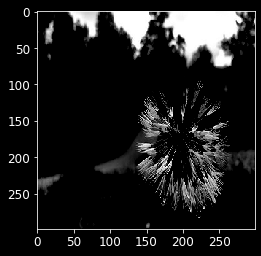

In [82]:
plt.imshow(X_test[0]) # or matshow
plt.show()

In [228]:
X_single_test =np.expand_dims(X_test[0], axis=0) # Alternatively we can use reshape(1, 299, 299, 3)

In [196]:
list_flowers[np.argmax(model.predict(X_single_test))]

'dandelion'

In [197]:
model.predict(X_single_test)

array([[6.9790445e-09, 1.4427865e-05, 9.9998450e-01, 4.0471701e-07,
        7.2782819e-07]], dtype=float32)

In [106]:
list_flowers[y_test[0]] #  it got it right ✔

'dandelion'

In [195]:
list_flowers

['roses', 'daisy', 'dandelion', 'sunflowers', 'tulips']

In [229]:
pred_array = model.predict(X_single_test)

In [235]:
pred_array[0]

array([6.9790445e-09, 1.4427865e-05, 9.9998450e-01, 4.0471701e-07,
       7.2782819e-07], dtype=float32)

In [238]:
# defining a function to retrieve the top 3 predictions 

def top_3_predictions(array, class_list):
    inx = array[0].argsort()[-3:][::-1] # getting the indexes of the top 3 predictions in descending order
    top_1 = array[0][inx[0]]*100
    top_2 = array[0][inx[1]]*100
    top_3 = array[0][inx[2]]*100
    class_1 = class_list[inx[0]]
    class_2 = class_list[inx[1]]
    class_3 = class_list[inx[2]]
    return print("Top 1 Prediction: With {:5.2f}% probability is a picture of {}.\nTop 2 Prediction: With {:5.2f}% probability is a picture of {}.\nTop 3 Prediction: With {:5.2f}% probability is a picture of {}.".format(top_1, class_1, top_2, class_2, top_3, class_3))

In [239]:
top_3_predictions(pred_array, list_flowers) # we can see that our model has a very confident solution for this example

Top 1 Prediction: With 100.00% probability is a picture of dandelion.
Top 2 Prediction: With  0.00% probability is a picture of daisy.
Top 3 Prediction: With  0.00% probability is a picture of tulips.


Now we will look at the confusion matrix to see what types of flowers are being easier to classify and what flowers are harder

In [50]:
y_predicted=model.predict(X_test)

In [51]:
y_predicted = [np.argmax(i) for i in y_predicted]

In [54]:
conf_x = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted)

In [249]:
conf_x = np.array(conf_x) # convert it to array object to use max() in the func below

In [276]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix-Flower Image Clasifier',
                          cmap=plt.cm.Blues):
    import itertools
    import numpy as np
    
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.rcParams["figure.figsize"] = (8,8)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=30, fontsize=12)
    plt.yticks(tick_marks, classes, fontsize=12)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')


    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label', labelpad=15)
    plt.xlabel('Predicted label', labelpad=15)
    plt.savefig("figures/corr_mat_NN_flowers.png", dpi=300,  bbox_inches="tight")
    plt.show()

Confusion matrix, without normalization


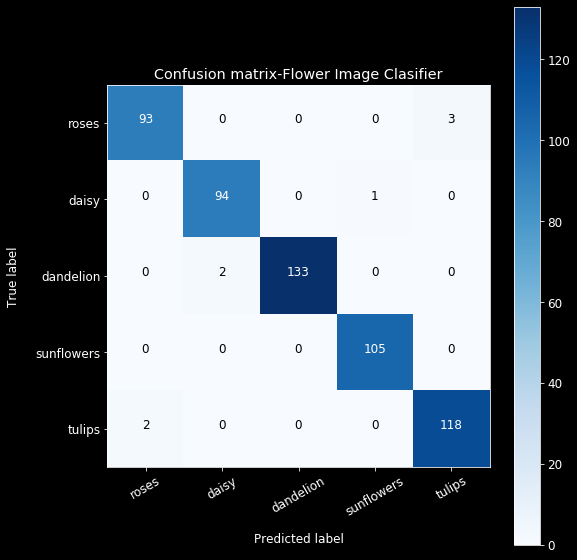

In [277]:
plot_confusion_matrix(conf_x, list_flowers)

2 tulips were misclassified as roses, 2 dandelions as daisy, 3 roses as tulips and 1 daisy as sunflower. No sunflowers were missclassified 🌻✔

**Lets inspect those images which we did not classify correctly**

In [56]:
y_test_serie = pd.Series(y_test)

In [59]:
y_pred_serie = pd.Series(y_predicted)

In [60]:
df_preds = pd.concat([y_test_serie,y_pred_serie], axis=1)

In [61]:
df_preds.columns = ["real", "predicted"]

In [63]:
df_missclass = df_preds.loc[(df_preds["real"] != df_preds["predicted"])]

In [64]:
flowers_labels_dict

{'roses': 0, 'daisy': 1, 'dandelion': 2, 'sunflowers': 3, 'tulips': 4}

In [65]:
def label_to_flower_name(num):
    for flower, label in flowers_labels_dict.items():
        if label==num:
            return flower

In [66]:
df_missclass["flower_class"] = df_missclass["real"].apply(label_to_flower_name)

In [67]:
counts = df_missclass["flower_class"].value_counts()

In [72]:
counts

roses        3
dandelion    2
tulips       2
daisy        1
Name: flower_class, dtype: int64

In [68]:
counts.index

Index(['roses', 'dandelion', 'tulips', 'daisy'], dtype='object')

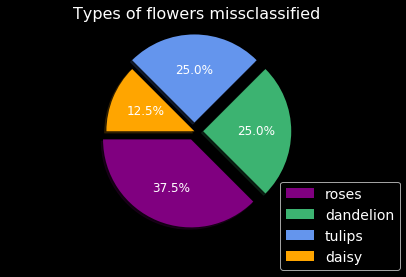

In [83]:
plt.style.use("dark_background")
mpl.rcParams['font.size'] = 12
plt_labels = counts.index
plt_sizes = counts
plt_explode = (0.1, 0.1, 0.1, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')
plt.pie(plt_sizes, explode=plt_explode, autopct='%1.1f%%',
        shadow=True, startangle=180, colors = ["purple", "mediumseagreen", "cornflowerblue", "orange", "plum"])
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(plt_labels, fontsize=14, bbox_to_anchor=(0.7,0.3))
plt.title("Types of flowers missclassified", fontsize=16)
plt.tight_layout()
# plt.savefig("figures/pie_chart_flowers.png", dpi=300, bbox_inches="tight")
plt.show()

The pie chart indicates that for increasing model performance we may want to increase the number of pictures for those flower types with largest missclassification (i.e. tulips).

In [75]:
misclassified_indexes = list(df_missclass.index)

Next, lets get the np.arrays from those indexes at the X_test set, and read them into pictures using plt.imshow(X_test[0])

Some of the pictures below seem indeed hard to be classified.

*Note: The pictures look different to the original ones due to the preprocessing step

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


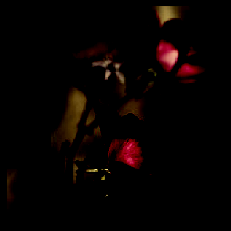

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


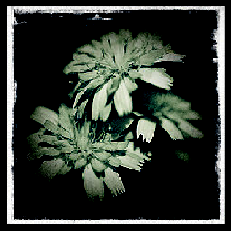

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


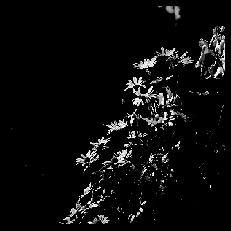

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


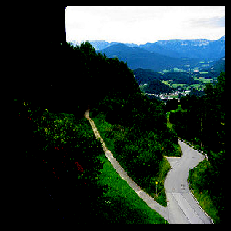

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


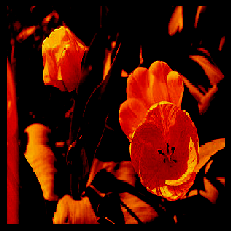

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


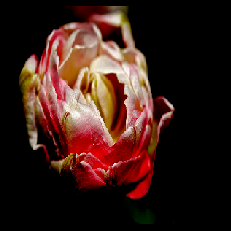

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


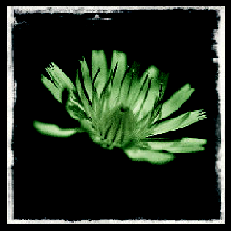

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


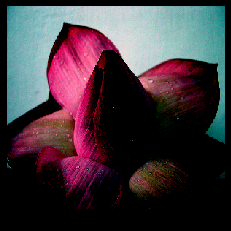

In [80]:
for i in range(X_test.shape[0]):
    if i in misclassified_indexes:
        plt.axis('off')
        plt.imshow(X_test[i])
        plt.show()